In [1]:
import pandas as pd
from pymongo import MongoClient


# Set the path to your Excel file
file_path = '/Users/ravindu/Desktop/Project3/Resources/Stock Markets, US$.xlsx'  # Update this path
stock_data = pd.read_excel(file_path)  # Read the stock data





In [2]:
# Show the first few rows of the dataset to check the structure
print(stock_data.head())


   Unnamed: 0  United Arab Emirates  Argentina  Australia   Austria   Belgium  \
0         NaN                   NaN        NaN        NaN       NaN       NaN   
1      1995.0                   NaN        NaN   33.98690  35.29171  52.61066   
2      1996.0                   NaN   23.91518   40.10000  37.32716  62.57487   
3      1997.0                   NaN   31.96844   42.72983  39.26318  72.09075   
4      1998.0                   NaN   23.74431   37.92748  39.90513  96.45048   

   Bulgaria  Bahrain  Bosnia and Herzegovina    Brazil  ...   Thailand  \
0       NaN      NaN                     NaN       NaN  ...        NaN   
1       NaN      NaN                     NaN  10.99475  ...  235.65850   
2       NaN      NaN                     NaN  15.10200  ...  209.35410   
3       NaN      NaN                     NaN  24.86574  ...   93.50412   
4       NaN      NaN                     NaN  20.79932  ...   39.09179   

    Tunisia    Turkey  Taiwan, China  Uganda   Ukraine  United State

In [3]:


# Clean the data by renaming columns and handling 'NA' values
stock_data_cleaned = stock_data.copy()

# Check if 'Unnamed: 0' is the first column (likely representing years or index)
stock_data_cleaned.rename(columns={"Unnamed: 0": "Year"}, inplace=True)

# Convert the 'Year' column to string (if necessary)
stock_data_cleaned['Year'] = stock_data_cleaned['Year'].astype(str)

# Handle 'NA' values (if you want to fill them with 0 or drop them)
stock_data_cleaned.fillna(0, inplace=True)  # You can replace '0' with other values like 'mean', 'median', etc.

# Check the cleaned data
print(stock_data_cleaned.head())

# If needed, save the cleaned data to a new Excel file
stock_data_cleaned.to_excel('cleaned_stock_data.xlsx', index=False)



     Year  United Arab Emirates  Argentina  Australia   Austria   Belgium  \
0     nan                   0.0    0.00000    0.00000   0.00000   0.00000   
1  1995.0                   0.0    0.00000   33.98690  35.29171  52.61066   
2  1996.0                   0.0   23.91518   40.10000  37.32716  62.57487   
3  1997.0                   0.0   31.96844   42.72983  39.26318  72.09075   
4  1998.0                   0.0   23.74431   37.92748  39.90513  96.45048   

   Bulgaria  Bahrain  Bosnia and Herzegovina    Brazil  ...   Thailand  \
0       0.0      0.0                     0.0   0.00000  ...    0.00000   
1       0.0      0.0                     0.0  10.99475  ...  235.65850   
2       0.0      0.0                     0.0  15.10200  ...  209.35410   
3       0.0      0.0                     0.0  24.86574  ...   93.50412   
4       0.0      0.0                     0.0  20.79932  ...   39.09179   

    Tunisia    Turkey  Taiwan, China  Uganda   Ukraine  United States  \
0   0.00000   0.000

In [4]:

# Clean the data by renaming columns and handling 'NA' values
stock_data_cleaned = stock_data.copy()

# Remove rows where the first column (Year) is NaN or contains non-year values
stock_data_cleaned = stock_data_cleaned[stock_data_cleaned.iloc[:, 0].notna()]

# Rename the first column to 'Year' (if needed)
stock_data_cleaned.rename(columns={stock_data_cleaned.columns[0]: "Year"}, inplace=True)

# Convert the 'Year' column to integer (if required)
stock_data_cleaned['Year'] = stock_data_cleaned['Year'].astype(int)

# Replace '0.0' with NaN to avoid confusion
stock_data_cleaned.replace(0.0, pd.NA, inplace=True)

# You can also fill missing values if necessary. For example, fill with 0:
# stock_data_cleaned.fillna(0, inplace=True)

# Check the cleaned data
print(stock_data_cleaned.head())

# If needed, save the cleaned data to a new Excel file
stock_data_cleaned.to_excel('cleaned_stock_data.xlsx', index=False)


   Year  United Arab Emirates  Argentina  Australia   Austria   Belgium  \
1  1995                   NaN        NaN   33.98690  35.29171  52.61066   
2  1996                   NaN   23.91518   40.10000  37.32716  62.57487   
3  1997                   NaN   31.96844   42.72983  39.26318  72.09075   
4  1998                   NaN   23.74431   37.92748  39.90513  96.45048   
5  1999                   NaN   20.79165   43.27264  33.73018  95.57480   

   Bulgaria  Bahrain  Bosnia and Herzegovina    Brazil  ...   Thailand  \
1       NaN      NaN                     NaN  10.99475  ...  235.65850   
2       NaN      NaN                     NaN  15.10200  ...  209.35410   
3       NaN      NaN                     NaN  24.86574  ...   93.50412   
4       NaN      NaN                     NaN  20.79932  ...   39.09179   
5       NaN      NaN                     NaN  15.82107  ...   50.58971   

    Tunisia    Turkey  Taiwan, China  Uganda    Ukraine  United States  \
1       NaN  24.71689       83

In [5]:


# Clean the data
stock_data_cleaned = stock_data.copy()

# Replace NaN with 0 for all columns except 'Year'
stock_data_cleaned.iloc[:, 1:] = stock_data_cleaned.iloc[:, 1:].fillna(0)

# Optionally, you can drop rows or columns with NaN if that fits your needs:
# stock_data_cleaned.dropna(axis=0, how='any', inplace=True)  # Drop rows with NaN
# stock_data_cleaned.dropna(axis=1, how='any', inplace=True)  # Drop columns with NaN

# Save the cleaned data to a new Excel file
stock_data_cleaned.to_excel('cleaned_stock_data_filled.xlsx', index=False)

# Show the cleaned data
print(stock_data_cleaned.head())


   Unnamed: 0  United Arab Emirates  Argentina  Australia   Austria   Belgium  \
0         NaN                   0.0    0.00000    0.00000   0.00000   0.00000   
1      1995.0                   0.0    0.00000   33.98690  35.29171  52.61066   
2      1996.0                   0.0   23.91518   40.10000  37.32716  62.57487   
3      1997.0                   0.0   31.96844   42.72983  39.26318  72.09075   
4      1998.0                   0.0   23.74431   37.92748  39.90513  96.45048   

   Bulgaria  Bahrain  Bosnia and Herzegovina    Brazil  ...   Thailand  \
0       0.0      0.0                     0.0   0.00000  ...    0.00000   
1       0.0      0.0                     0.0  10.99475  ...  235.65850   
2       0.0      0.0                     0.0  15.10200  ...  209.35410   
3       0.0      0.0                     0.0  24.86574  ...   93.50412   
4       0.0      0.0                     0.0  20.79932  ...   39.09179   

    Tunisia    Turkey  Taiwan, China  Uganda   Ukraine  United State

In [6]:

# Rename the 'Unnamed: 0' column to 'Year'
stock_data.rename(columns={'Unnamed: 0': 'Year'}, inplace=True)

# Remove the first row that contains NaN in the 'Year' column
stock_data = stock_data.dropna(subset=['Year'])

# Reset the index to clean up after dropping rows
stock_data.reset_index(drop=True, inplace=True)

# Optionally, replace NaN values with 0 for all columns except 'Year'
stock_data.iloc[:, 1:] = stock_data.iloc[:, 1:].fillna(0)

# Save the cleaned data to a new Excel file
stock_data.to_excel('cleaned_stock_data.xlsx', index=False)

# Show the cleaned data
print(stock_data.head())


     Year  United Arab Emirates  Argentina  Australia   Austria   Belgium  \
0  1995.0                   0.0    0.00000   33.98690  35.29171  52.61066   
1  1996.0                   0.0   23.91518   40.10000  37.32716  62.57487   
2  1997.0                   0.0   31.96844   42.72983  39.26318  72.09075   
3  1998.0                   0.0   23.74431   37.92748  39.90513  96.45048   
4  1999.0                   0.0   20.79165   43.27264  33.73018  95.57480   

   Bulgaria  Bahrain  Bosnia and Herzegovina    Brazil  ...   Thailand  \
0       0.0      0.0                     0.0  10.99475  ...  235.65850   
1       0.0      0.0                     0.0  15.10200  ...  209.35410   
2       0.0      0.0                     0.0  24.86574  ...   93.50412   
3       0.0      0.0                     0.0  20.79932  ...   39.09179   
4       0.0      0.0                     0.0  15.82107  ...   50.58971   

    Tunisia    Turkey  Taiwan, China  Uganda    Ukraine  United States  \
0   0.00000  24.71

In [7]:
import pandas as pd

# Load the Excel file and sheet into a DataFrame
df = pd.read_excel('cleaned_stock_data.xlsx', sheet_name='Sheet1')

# Display the first few rows of the dataframe to inspect the data
print(df.head())


   Year  United Arab Emirates  Argentina  Australia   Austria   Belgium  \
0  1995                   0.0    0.00000   33.98690  35.29171  52.61066   
1  1996                   0.0   23.91518   40.10000  37.32716  62.57487   
2  1997                   0.0   31.96844   42.72983  39.26318  72.09075   
3  1998                   0.0   23.74431   37.92748  39.90513  96.45048   
4  1999                   0.0   20.79165   43.27264  33.73018  95.57480   

   Bulgaria  Bahrain  Bosnia and Herzegovina    Brazil  ...   Thailand  \
0       0.0      0.0                     0.0  10.99475  ...  235.65850   
1       0.0      0.0                     0.0  15.10200  ...  209.35410   
2       0.0      0.0                     0.0  24.86574  ...   93.50412   
3       0.0      0.0                     0.0  20.79932  ...   39.09179   
4       0.0      0.0                     0.0  15.82107  ...   50.58971   

    Tunisia    Turkey  Taiwan, China  Uganda    Ukraine  United States  \
0   0.00000  24.71689       83

In [8]:
# Check for missing values in the dataframe
missing_data = df.isnull().sum()
print(missing_data)

# Option 1: Fill missing values with 0
df.fillna(0, inplace=True)

# Option 2: Alternatively, you can fill missing values with the mean of each column (if required)
# df.fillna(df.mean(), inplace=True)

# Check again for missing values after handling
missing_data_after = df.isnull().sum()
print(missing_data_after)


Year                    0
United Arab Emirates    0
Argentina               0
Australia               0
Austria                 0
                       ..
Ukraine                 0
United States           0
Venezuela, RB           0
Viet Nam                0
South Africa            0
Length: 79, dtype: int64
Year                    0
United Arab Emirates    0
Argentina               0
Australia               0
Austria                 0
                       ..
Ukraine                 0
United States           0
Venezuela, RB           0
Viet Nam                0
South Africa            0
Length: 79, dtype: int64


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your cleaned dataset
df = pd.read_excel('cleaned_stock_data.xlsx', sheet_name='Sheet1')

# Filter data for the year 2009
df_2009 = df[df['Year'] == 2009]

# Show the filtered dataframe to check the results
print(df_2009.head())


    Year  United Arab Emirates  Argentina  Australia   Austria   Belgium  \
14  2009              106.6436    69.3786   73.60899  80.66908  83.35619   

    Bulgaria   Bahrain  Bosnia and Herzegovina    Brazil  ...  Thailand  \
14  86.50294  106.9228                112.0967  70.79969  ...  77.37459   

     Tunisia    Turkey  Taiwan, China    Uganda   Ukraine  United States  \
14  77.96128  66.13794       76.46217  89.16151  68.10577       84.76696   

    Venezuela, RB  Viet Nam  South Africa  
14            0.0  88.08797      76.32392  

[1 rows x 79 columns]


In [10]:
# Calculate mean, median, and standard deviation for each country's stock values
stats = df.describe().T[['mean', '50%', 'std']]  # '50%' represents the median
stats.rename(columns={'50%': 'median'}, inplace=True)

# Display the statistics
print(stats)


                             mean       median           std
Year                  2009.500000  2009.500000      8.803408
United Arab Emirates   116.566401   119.144800    102.884657
Argentina             3311.193641    99.166260  11978.204003
Australia               81.773975    95.119670     30.976337
Austria                 77.787449    83.355950     35.566074
...                           ...          ...           ...
Ukraine                 49.704468    24.775850     57.371718
United States          154.544644   111.615400     91.015480
Venezuela, RB            5.340616     0.000000     29.026156
Viet Nam                94.461894    90.887340     65.991994
South Africa            73.215290    92.323995     48.060372

[79 rows x 3 columns]


In [11]:
# Recalculate the mean, median, and standard deviation for each country in 2009
df_2009_stats = df_2009.drop(columns='Year').agg(['mean', 'median', 'std'])

# Transpose to have countries as rows
df_2009_stats = df_2009_stats.transpose()

# Show the statistics
print(df_2009_stats)


                           mean     median  std
United Arab Emirates  106.64360  106.64360  NaN
Argentina              69.37860   69.37860  NaN
Australia              73.60899   73.60899  NaN
Austria                80.66908   80.66908  NaN
Belgium                83.35619   83.35619  NaN
...                         ...        ...  ...
Ukraine                68.10577   68.10577  NaN
United States          84.76696   84.76696  NaN
Venezuela, RB           0.00000    0.00000  NaN
Viet Nam               88.08797   88.08797  NaN
South Africa           76.32392   76.32392  NaN

[78 rows x 3 columns]


In [12]:
# Recalculate the mean and median for each country in 2009 (without std)
df_2009_stats = df_2009.drop(columns='Year').agg(['mean', 'median'])

# Transpose to have countries as rows
df_2009_stats = df_2009_stats.transpose()

# Show the statistics
print(df_2009_stats)


                           mean     median
United Arab Emirates  106.64360  106.64360
Argentina              69.37860   69.37860
Australia              73.60899   73.60899
Austria                80.66908   80.66908
Belgium                83.35619   83.35619
...                         ...        ...
Ukraine                68.10577   68.10577
United States          84.76696   84.76696
Venezuela, RB           0.00000    0.00000
Viet Nam               88.08797   88.08797
South Africa           76.32392   76.32392

[78 rows x 2 columns]


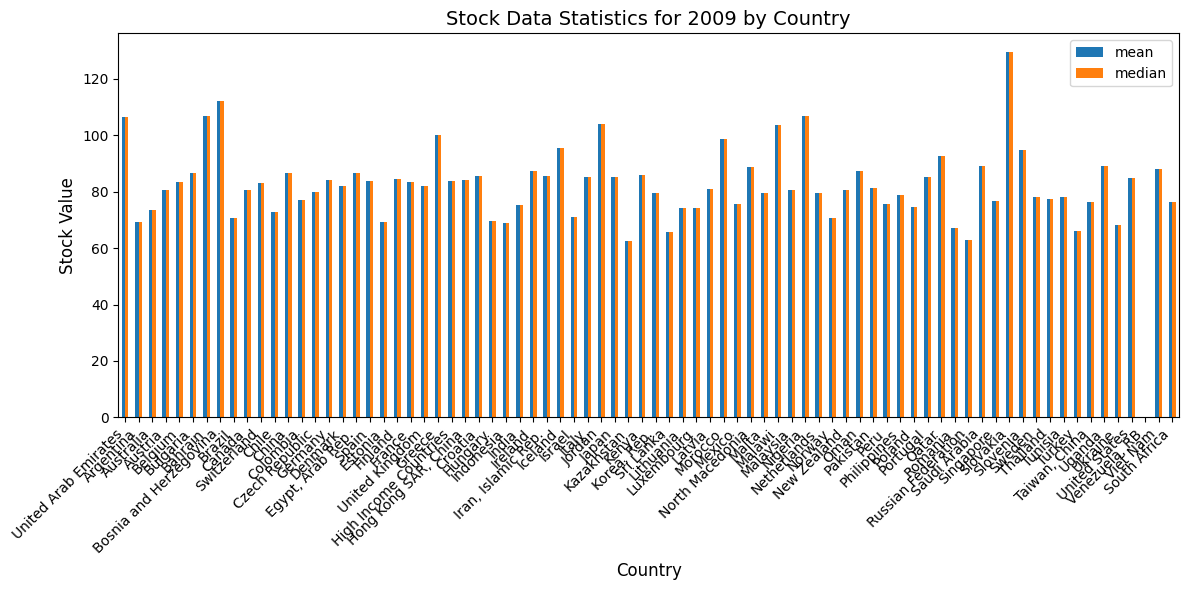

In [13]:
# Plotting the mean and median for the year 2009 (without std)
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the mean and median as a bar chart (remove 'std')
df_2009_stats[['mean', 'median']].plot(kind='bar', ax=ax)

# Customize the plot
ax.set_title('Stock Data Statistics for 2009 by Country', fontsize=14)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Stock Value', fontsize=12)
ax.set_xticklabels(df_2009_stats.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [14]:
# Sort by mean stock value for 2009 (ascending to get lowest first)
sorted_by_mean_2009 = df_2009_stats['mean'].sort_values(ascending=False)

# Get the top 5 highest and top 5 lowest countries
top_5_highest = sorted_by_mean_2009.head(5)
top_5_lowest = sorted_by_mean_2009.tail(5)

# Show the top 5 highest and lowest countries based on the mean
print("Top 5 Highest Countries:")
print(top_5_highest)

print("\nTop 5 Lowest Countries:")
print(top_5_lowest)


Top 5 Highest Countries:
Slovakia                  129.6691
Bosnia and Herzegovina    112.0967
Bahrain                   106.9228
Nigeria                   106.9129
United Arab Emirates      106.6436
Name: mean, dtype: float64

Top 5 Lowest Countries:
Turkey                66.13794
Sri Lanka             65.86170
Russian Federation    62.72740
Kazakhstan            62.69666
Venezuela, RB          0.00000
Name: mean, dtype: float64


In [15]:
# Check the column names of the DataFrame
print(df_2009.columns)


Index(['Year', 'United Arab Emirates', 'Argentina', 'Australia', 'Austria',
       'Belgium', 'Bulgaria', 'Bahrain', 'Bosnia and Herzegovina', 'Brazil',
       'Canada', 'Switzerland', 'Chile', 'China', 'Colombia', 'Czech Republic',
       'Germany', 'Denmark', 'Egypt, Arab Rep.', 'Spain', 'Estonia', 'Finland',
       'France', 'United Kingdom', 'Greece', 'High Income Countries',
       'Hong Kong SAR, China', 'Croatia', 'Hungary', 'Indonesia', 'India',
       'Ireland', 'Iran, Islamic Rep.', 'Iceland', 'Israel', 'Italy', 'Jordan',
       'Japan', 'Kazakhstan', 'Kenya', 'Korea, Rep.', 'Sri Lanka', 'Lithuania',
       'Luxembourg', 'Latvia', 'Morocco', 'Mexico', 'North Macedonia', 'Malta',
       'Malawi', 'Malaysia', 'Nigeria', 'Netherlands', 'Norway', 'New Zealand',
       'Oman', 'Pakistan', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Qatar', 'Romania', 'Russian Federation', 'Saudi Arabia', 'Singapore',
       'Slovakia', 'Slovenia', 'Sweden', 'Thailand', 'Tunisia', 'Turkey'

In [16]:
# List of the top 5 highest and lowest countries (these should be the actual country names)
top_5_highest = ['Slovakia', 'Bosnia and Herzegovina', 'Bahrain', 'Nigeria', 'United Arab Emirates']
top_5_lowest = ['Turkey', 'Sri Lanka', 'Russian Federation', 'Kazakhstan', 'Venezuela, RB']

# Step 2: Filter the data for these countries
df_filtered = df_2009[['Year'] + top_5_highest + top_5_lowest]

# Step 3: Calculate statistics (mean, median) for the filtered countries (without std)
statistics = df_filtered.drop(columns='Year').agg(['mean', 'median']).transpose()

# Display the statistics
print(statistics)


                             mean     median
Slovakia                129.66910  129.66910
Bosnia and Herzegovina  112.09670  112.09670
Bahrain                 106.92280  106.92280
Nigeria                 106.91290  106.91290
United Arab Emirates    106.64360  106.64360
Turkey                   66.13794   66.13794
Sri Lanka                65.86170   65.86170
Russian Federation       62.72740   62.72740
Kazakhstan               62.69666   62.69666
Venezuela, RB             0.00000    0.00000


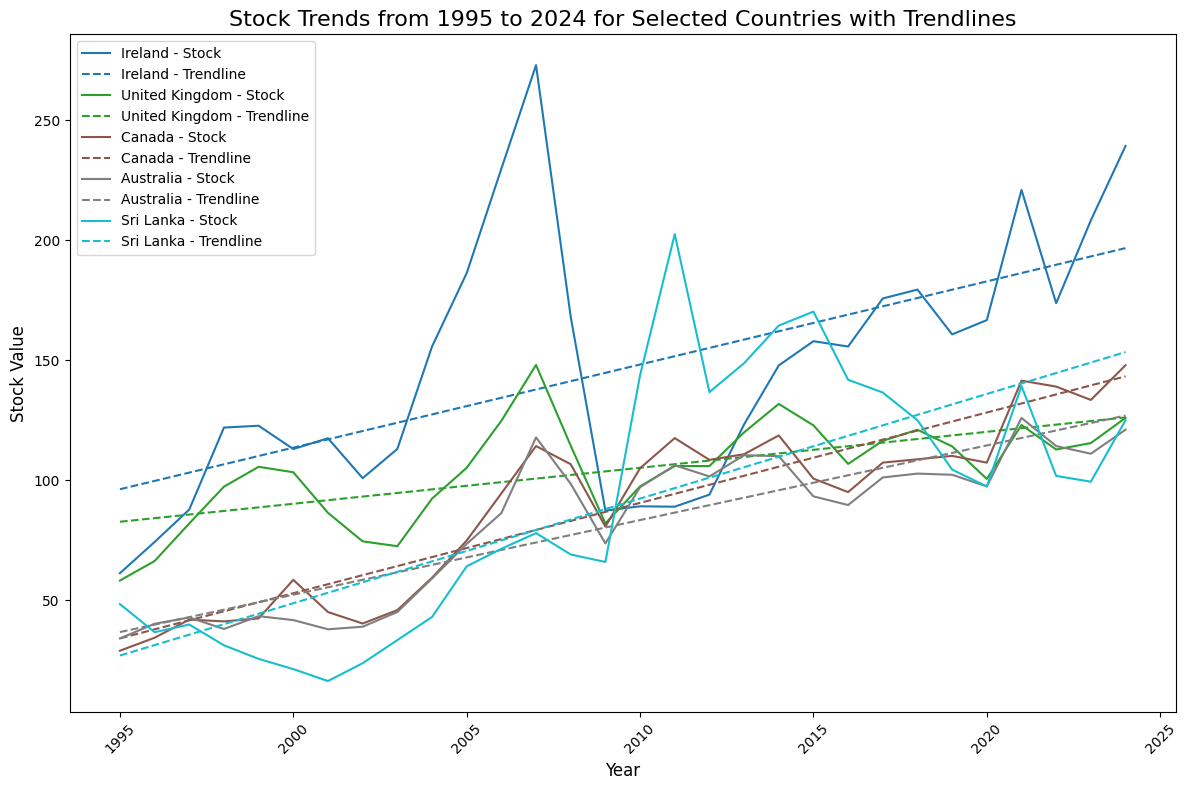

Interactive plot saved as 'stock_trends_plot.html'


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mpld3  # Ensure this is installed

# Step 1: Load the cleaned Excel file into a DataFrame
df = pd.read_excel('cleaned_stock_data.xlsx', sheet_name='Sheet1')

# Step 2: Define your custom list of countries
selected_countries = ['Ireland', 'United Kingdom', 'Canada', 'Australia', 'Sri Lanka']

# Step 3: Filter the data for selected countries (assuming 'Year' is the first column)
df_filtered = df[['Year'] + selected_countries]

# Step 4: Ensure the 'Year' column is treated as integers
df_filtered.loc[:, 'Year'] = df_filtered['Year'].astype(int)

# Step 5: Filter the data for the years between 1995 and 2024
df_filtered = df_filtered[(df_filtered['Year'] >= 1995) & (df_filtered['Year'] <= 2024)]

# Step 6: Plotting the trendline for each selected country
plt.figure(figsize=(12, 8))

# Assign colors to countries for consistent plotting
colors = plt.colormaps['tab10'](np.linspace(0, 1, len(selected_countries)))

for i, country in enumerate(selected_countries):
    color = colors[i]
    
    # Plot the stock values for the country
    plt.plot(df_filtered['Year'], df_filtered[country], label=f'{country} - Stock', color=color)

    # Add a trendline
    z = np.polyfit(df_filtered['Year'], df_filtered[country], 1)  # Linear fit
    p = np.poly1d(z)  # Create a polynomial from the fit

    # Plot the trendline with the same color as the country line
    plt.plot(df_filtered['Year'], p(df_filtered['Year']), '--', label=f'{country} - Trendline', color=color)

# Step 7: Adding titles and labels
plt.title('Stock Trends from 1995 to 2024 for Selected Countries with Trendlines', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Stock Value', fontsize=12)

# Step 8: Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Step 9: Add a legend to distinguish countries and their trendlines
plt.legend()

# Save the plot as a PNG image
plt.savefig('stock_trends_plot.png')

# Save as an interactive HTML file
mpld3.save_html(plt.gcf(), 'stock_trends_plot.html')

plt.tight_layout()
plt.show()

print("Interactive plot saved as 'stock_trends_plot.html'")


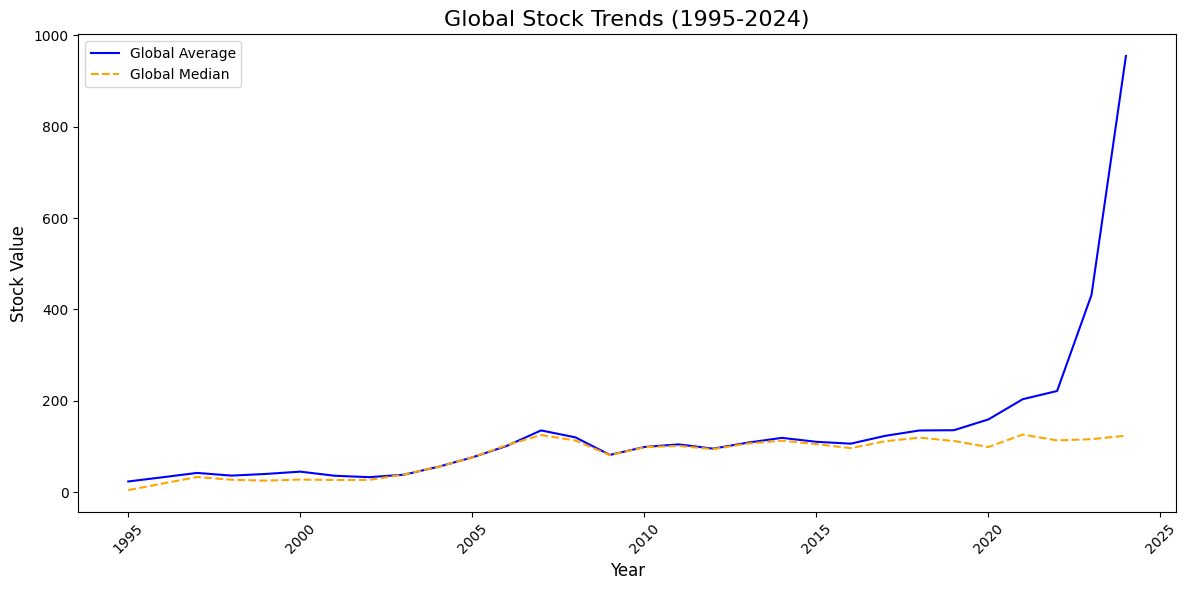

/opt/anaconda3/lib/python3.12/site-packages/mpld3/mplexporter/utils.py:68: UserWarning: line style '(0.0, None)' not understood: defaulting to solid line.
  warnings.warn("line style '{0}' not understood: "


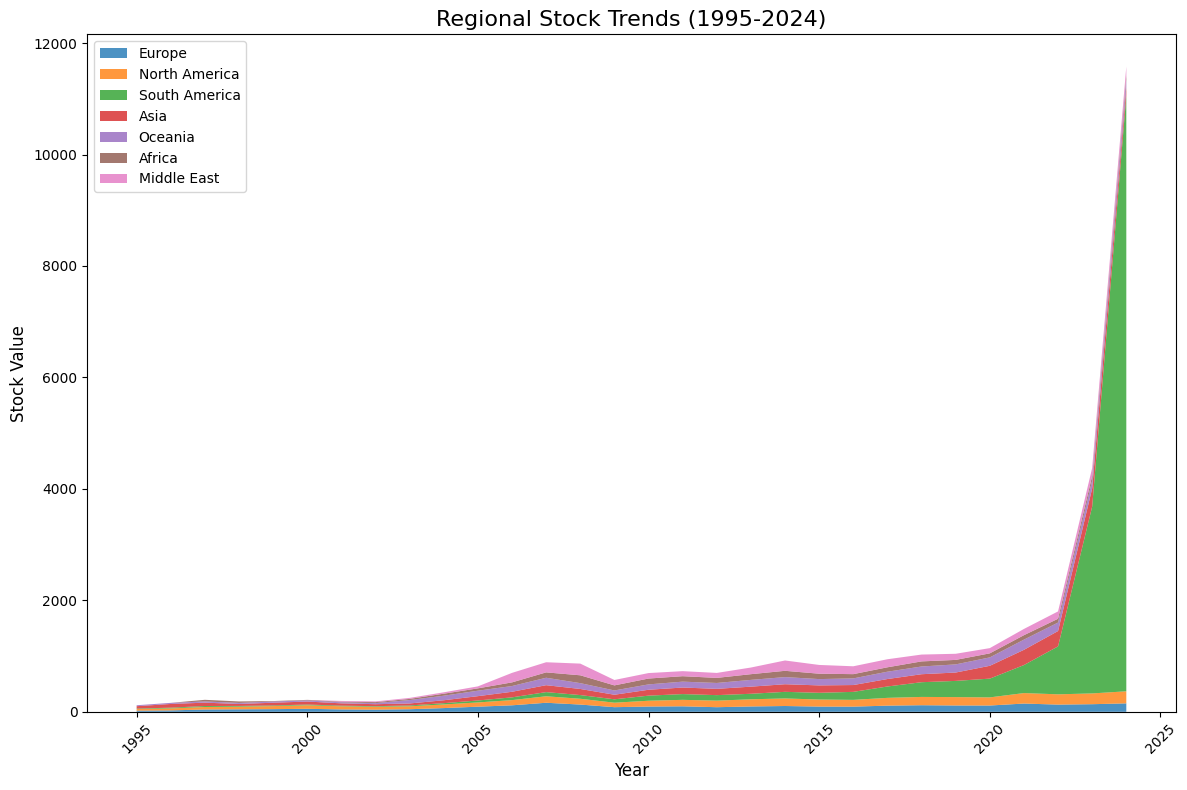

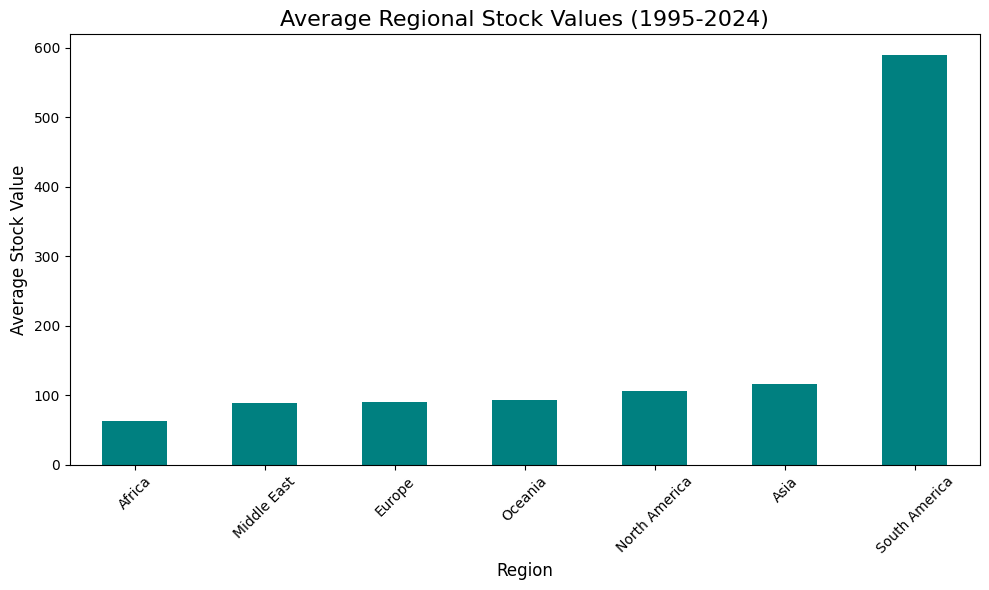

All plots saved as PNG and HTML files.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mpld3

# Step 1: Load the cleaned Excel file into a DataFrame
df = pd.read_excel('cleaned_stock_data.xlsx', sheet_name='Sheet1')

# Step 2: Extract all countries (assume first column is 'Year')
all_countries = list(df.columns[1:])  # Exclude 'Year'

# Step 3: Ensure the 'Year' column is treated as integers
df.loc[:, 'Year'] = df['Year'].astype(int)

# Step 4: Filter the data for the years between 1995 and 2024
df_filtered = df[(df['Year'] >= 1995) & (df['Year'] <= 2024)]

# Step 5: Global Aggregates - Calculate the average and median stock value globally for each year
df_filtered['Global Average'] = df_filtered[all_countries].mean(axis=1)
df_filtered['Global Median'] = df_filtered[all_countries].median(axis=1)

# Step 6: Plotting Global Trends
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['Year'], df_filtered['Global Average'], label='Global Average', color='blue', linestyle='-')
plt.plot(df_filtered['Year'], df_filtered['Global Median'], label='Global Median', color='orange', linestyle='--')

# Add labels and titles
plt.title('Global Stock Trends (1995-2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Stock Value', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('global_trends_plot.png')
mpld3.save_html(plt.gcf(), 'global_trends_plot.html')
plt.show()

# Step 7: Regional Trends - Define regions and group countries
regions = {
    'Europe': ['Austria', 'Belgium', 'Bulgaria', 'Bosnia and Herzegovina', 'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom'],
    'North America': ['Canada', 'United States', 'Mexico'],
    'South America': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Peru', 'Venezuela, RB'],
    'Asia': ['Bahrain', 'China', 'Hong Kong SAR, China', 'India', 'Indonesia', 'Iran, Islamic Rep.', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Korea, Rep.', 'Malaysia', 'Pakistan', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Thailand', 'Taiwan, China', 'Viet Nam'],
    'Oceania': ['Australia', 'New Zealand'],
    'Africa': ['Egypt, Arab Rep.', 'Kenya', 'Malawi', 'Morocco', 'Nigeria', 'South Africa', 'Tunisia', 'Uganda'],
    'Middle East': ['United Arab Emirates', 'Oman'],
}

# Calculate regional averages
df_filtered_regions = pd.DataFrame()
df_filtered_regions['Year'] = df_filtered['Year']

for region, countries in regions.items():
    # Filter countries that exist in the dataset
    valid_countries = [country for country in countries if country in df_filtered.columns]
    df_filtered_regions[region] = df_filtered[valid_countries].mean(axis=1)

# Step 8: Plot Regional Trends
plt.figure(figsize=(12, 8))

# Stacked Area Chart for Regional Trends
plt.stackplot(
    df_filtered_regions['Year'],
    [df_filtered_regions[region] for region in regions.keys()],
    labels=regions.keys(),
    alpha=0.8
)

# Add labels and titles
plt.title('Regional Stock Trends (1995-2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Stock Value', fontsize=12)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('regional_trends_plot.png')
mpld3.save_html(plt.gcf(), 'regional_trends_plot.html')
plt.show()

# Step 9: Grouped Bar Plot for Yearly Regional Averages
regional_averages = df_filtered_regions.drop(columns=['Year']).mean().sort_values()

plt.figure(figsize=(10, 6))
regional_averages.plot(kind='bar', color='teal')

# Add labels and titles
plt.title('Average Regional Stock Values (1995-2024)', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average Stock Value', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('regional_bar_plot.png')
mpld3.save_html(plt.gcf(), 'regional_bar_plot.html')
plt.show()

print("All plots saved as PNG and HTML files.")


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import mpld3

# Step 1: Load the cleaned Excel file into a DataFrame
df = pd.read_excel('cleaned_stock_data.xlsx', sheet_name='Sheet1')

# Step 2: Extract all countries (assume first column is 'Year')
all_countries = list(df.columns[1:])  # Exclude 'Year'

# Step 3: Ensure the 'Year' column is treated as integers
df.loc[:, 'Year'] = df['Year'].astype(int)

# Step 4: Filter the data for the years between 1995 and 2024
df_filtered = df[(df['Year'] >= 1995) & (df['Year'] <= 2024)]

# Step 5: Global Aggregates - Calculate the average and median stock value globally for each year
df_filtered['Global Average'] = df_filtered[all_countries].mean(axis=1)
df_filtered['Global Median'] = df_filtered[all_countries].median(axis=1)

# Open an HTML file to save all plots
with open('informative_stock_trends.html', 'w') as f:
    f.write('<html lang="en"><head><meta charset="UTF-8"><meta name="viewport" content="width=device-width, initial-scale=1.0">')
    f.write('<title>Global Stock Trends (1995-2024)</title>')
    f.write('<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/5.15.4/css/all.min.css">')
    f.write('<style>body { font-family: Arial, sans-serif; line-height: 1.6; margin: 20px; background-color: #f4f4f4; color: #333; }')
    f.write('h1, h2 { color: #2c3e50; } .section { margin-bottom: 40px; } .section-title { background-color: #2980b9; color: white; padding: 10px; border-radius: 5px; font-size: 18px;}')
    f.write('.content { padding: 20px; background-color: white; border-radius: 8px; margin-top: 10px; box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);} </style></head><body>')

    # Page Header
    f.write('<h1>Stock Trends Analysis (1995-2024)</h1>')
    f.write('<p>Welcome to the global stock trends analysis. This report includes global and regional stock trends for the years 1995 to 2024. Interactive plots are embedded for easy exploration.</p>')

    # Step 6: Global Trends - Plotting Global Trends
    f.write('<div class="section">')
    f.write('<div class="section-title">Global Stock Trends</div>')
    f.write('<div class="content">')
    f.write('<p>Below is the plot showing the global average and median stock values for the years 1995 to 2024.</p>')
    plt.figure(figsize=(12, 6))
    plt.plot(df_filtered['Year'], df_filtered['Global Average'], label='Global Average', color='blue', linestyle='-')
    plt.plot(df_filtered['Year'], df_filtered['Global Median'], label='Global Median', color='orange', linestyle='--')
    plt.title('Global Stock Trends (1995-2024)', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Stock Value', fontsize=12)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    f.write(mpld3.fig_to_html(plt.gcf()))
    plt.close()
    f.write('</div></div>')

    # Step 7: Regional Trends - Define regions and group countries
    regions = {
        'Europe': ['Austria', 'Belgium', 'Bulgaria', 'Bosnia and Herzegovina', 'Croatia', 'Czech Republic', 'Denmark',
                   'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy',
                   'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'North Macedonia', 'Norway', 'Poland',
                   'Portugal', 'Romania', 'Russian Federation', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
                   'Ukraine', 'United Kingdom'],
        'North America': ['Canada', 'United States', 'Mexico'],
        'South America': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Peru', 'Venezuela, RB'],
        'Asia': ['Bahrain', 'China', 'Hong Kong SAR, China', 'India', 'Indonesia', 'Iran, Islamic Rep.', 'Israel',
                 'Japan', 'Jordan', 'Kazakhstan', 'Korea, Rep.', 'Malaysia', 'Pakistan', 'Philippines', 'Qatar',
                 'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Thailand', 'Taiwan, China', 'Viet Nam'],
        'Oceania': ['Australia', 'New Zealand'],
        'Africa': ['Egypt, Arab Rep.', 'Kenya', 'Malawi', 'Morocco', 'Nigeria', 'South Africa', 'Tunisia', 'Uganda'],
        'Middle East': ['United Arab Emirates', 'Oman'],
    }

    # Calculate regional averages
    df_filtered_regions = pd.DataFrame()
    df_filtered_regions['Year'] = df_filtered['Year']

    for region, countries in regions.items():
        valid_countries = [country for country in countries if country in df_filtered.columns]
        df_filtered_regions[region] = df_filtered[valid_countries].mean(axis=1)

    # Step 8: Regional Trends - Plotting Regional Trends
    f.write('<div class="section">')
    f.write('<div class="section-title">Regional Stock Trends</div>')
    f.write('<div class="content">')
    f.write('<p>Below is the stacked plot showing the regional stock trends for the years 1995 to 2024.</p>')
    plt.figure(figsize=(12, 8))
    plt.stackplot(
        df_filtered_regions['Year'],
        [df_filtered_regions[region] for region in regions.keys()],
        labels=regions.keys(),
        alpha=0.8
    )
    plt.title('Regional Stock Trends (1995-2024)', fontsize=16)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Stock Value', fontsize=12)
    plt.legend(loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    f.write(mpld3.fig_to_html(plt.gcf()))
    plt.close()
    f.write('</div></div>')

    # Step 9: Grouped Bar Plot for Yearly Regional Averages
    regional_averages = df_filtered_regions.drop(columns=['Year']).mean().sort_values()
    f.write('<div class="section">')
    f.write('<div class="section-title">Average Regional Stock Values</div>')
    f.write('<div class="content">')
    f.write('<p>Below is a bar plot showing the average stock value for each region over the years 1995-2024.</p>')
    plt.figure(figsize=(10, 6))
    regional_averages.plot(kind='bar', color='teal')
    plt.title('Average Regional Stock Values (1995-2024)', fontsize=16)
    plt.xlabel('Region', fontsize=12)
    plt.ylabel('Average Stock Value', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    f.write(mpld3.fig_to_html(plt.gcf()))
    plt.close()
    f.write('</div></div>')

    # Footer
    f.write('<footer><p style="text-align:center;">Generated by Stock Trends Analysis - 2024</p></footer>')
    f.write('</body></html>')

print("All plots and content have been saved in a single HTML report named 'informative_stock_trends.html'.")


All plots and content have been saved in a single HTML report named 'informative_stock_trends.html'.


/opt/anaconda3/lib/python3.12/site-packages/mpld3/mplexporter/utils.py:68: UserWarning: line style '(0.0, None)' not understood: defaulting to solid line.
  warnings.warn("line style '{0}' not understood: "
